#  Univariate, Bivariate and Multi-variate Exploratory data analysis 

##  1. Defining the question

###  a) Specifying the analytic data question

how we can predict which individuals are most likely to have or use a bank account.

### b)Defining the metric for success

finding the factors that are related to having a bank account

### c) Understanding the context 



factors such as size of households , 

###  d) Recording the experimental design 

### e) Data Relevance 

##  2. Reading the data 

In [220]:
# Importing the libraries that we plan on using
import pandas as pd 
import numpy as np 
import sklearn.datasets 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [221]:
# Reading the data files provided 
df = pd.read_csv('http://bit.ly/FinancialDataset')

##  3.Checking the data 

In [222]:
# Previewing the first few recors in our dataset 
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [179]:
# Previewing the last few records in our dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [223]:
# Checking the number of records in the dataset
len(df)

23524

In [224]:
# Checking if each column has the appropriate datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


##  4. Tidying the dataset 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


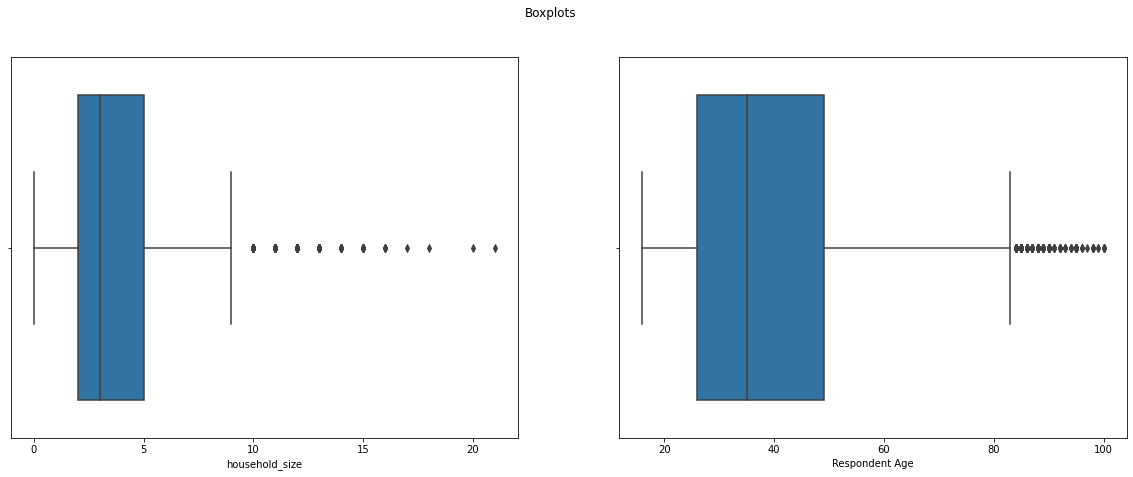

In [225]:
# Checking for outliers 
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(df['household_size'], ax=ax1)
sns.boxplot(df['Respondent Age'], ax=ax2)
plt.show()
#By observation there are outliers in the data 

In [226]:
#Checking for anomalies 
# Finding the interquartile range
q1 = df['household_size'].quantile(.25)
q3= df['household_size'].quantile(.75)
iqr = q3 - q1
#finding the end of the whiskers in the box and whisker
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
#Checking if there are any values above the whiskers in the data
def over(x):
  for x in df['household_size']: 
     if x > u_bound:
       return 'Anomaly'
     elif x < u_bound:
       continue 
     else:
       break 
over(df)

'Anomaly'

In [227]:
q1_2 = df['Respondent Age'].quantile(.25)
q3_2= df['Respondent Age'].quantile(.75)
iqr2 = q3_2 - q1_2
l_bound = q1_2 - (1.5*iqr)
u_bound = q3_2 + (1.5 * iqr)

def over(x):
  for y in df['Respondent Age']: 
     if y > u_bound:
       return 'Anomaly'
     elif y < u_bound:
       continue 
     else:
       break 
over(df)

'Anomaly'

In [228]:
#Checking for missing values 
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [229]:
# Dealing with missing values 
df = df.dropna()

In [230]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [188]:
# Other data cleaning procedures 
#Converting the year column to datetime
df['year'] = pd.to_datetime(df['year'])

In [231]:
#Changing the yes and nos in whether they have a bank account to true and false so that we can change to numbers for better analysis 
df['Has a Bank account'] = df['Has a Bank account'].apply(lambda x :  True if x == 'Yes' else  False)

In [232]:
#Converting it to a float 
df['Has a Bank account']= df['Has a Bank account'].astype(float)

## 5. Exploratory analysis 

In [233]:
# Calculating measures of central tendancies 
# Doing some exploratory data analysis
describe = df.describe()

In [234]:
#Finding the Mode of most of the data for better understanding with what we are dealing with 
print(df['Cell Phone Access'].mode())
print(df['country'].mode())
print(df['Has a Bank account'].mode())
print(df['household_size'].mode())
print(df['Level of Educuation'].mode())
print(df['marital_status'].mode())
print(df['Respondent Age'].mode())
print(df['gender_of_respondent'].mode())
print(df['Type of Job'].mode())
print(df['The relathip with head'].mode())
print(df['Type of Location'].mode())
print(df['year'].mode())

0    Yes
dtype: object
0    Rwanda
dtype: object
0    0.0
dtype: float64
0    2.0
dtype: float64
0    Primary education
dtype: object
0    Married/Living together
dtype: object
0    30.0
dtype: float64
0    Female
dtype: object
0    Self employed
dtype: object
0    Head of Household
dtype: object
0    Rural
dtype: object
0    2016
dtype: int64


In [235]:
# Calculating measures of dispersion 
# Calculating the variance and standard deviation
print(df['household_size'].var())
print(df['Respondent Age'].var())
print(df['household_size'].std())
print(df['Respondent Age'].std())

5.20379827489179
272.90390761391353
2.2811835250351495
16.51980349804178


In [236]:
# Calculating skewness and kurtosis 
print(df['household_size'].skew())
print(df['Respondent Age'].skew())
print(df['household_size'].kurt())
print(df['Respondent Age'].kurt())

0.9741086837897069
0.840661747532081
1.1538690689335573
0.09844652254807196


In [237]:
#Bivariate analysis 
df['household_size'].corr(df['Respondent Age'])

-0.11970919507762415

In [245]:
df['Has a Bank account'].corr(df['household_size'])

-0.0230498473397427

In [246]:
df['Has a Bank account'].corr(df['Respondent Age'])

0.01964467227121254

In [238]:
from scipy import stats
stats.zscore(df['household_size'])

array([-0.30188629,  0.57487037,  0.57487037, ...,  0.57487037,
        1.45162703,  2.76676201])

In [247]:
stats.zscore(df['Has a Bank account'])

array([ 2.46578036, -0.40555113,  2.46578036, ..., -0.40555113,
       -0.40555113, -0.40555113])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


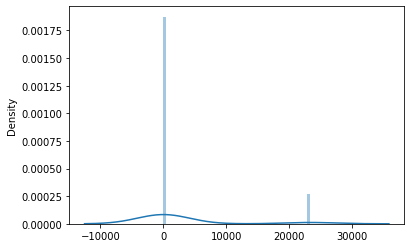

In [199]:
# Plotting univariate analysis
sns.distplot(describe)

In [201]:
Age = df['Level of Educuation'].value_counts()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


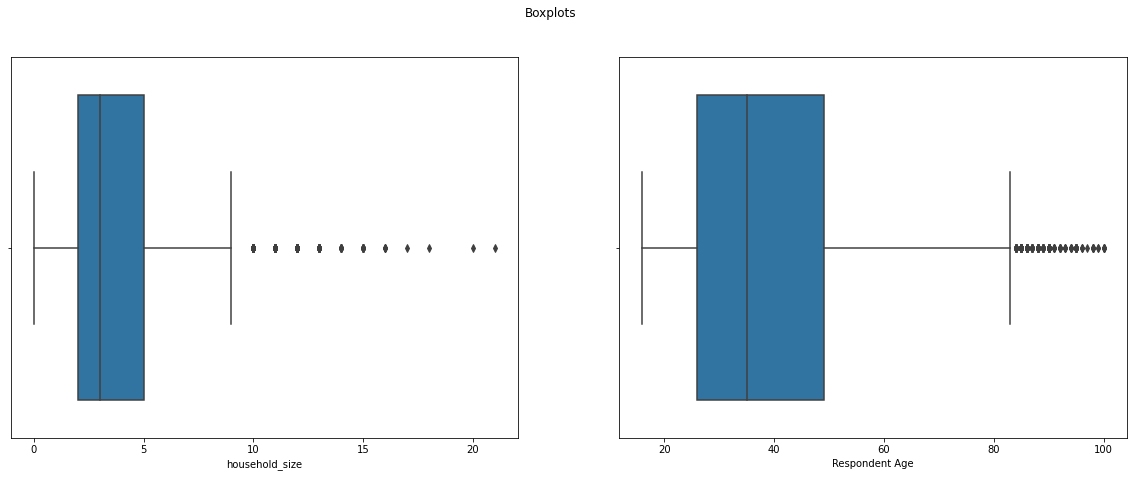

In [202]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(df['household_size'], ax=ax1)
sns.boxplot(df['Respondent Age'], ax=ax2)
plt.show()

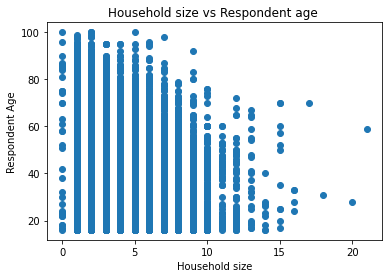

In [203]:
# Plotting bivariate analysis
plt.scatter(df['household_size'] ,df["Respondent Age"])
plt.title('Household size vs Respondent age ')
plt.xlabel('Household size')
plt.ylabel('Respondent Age')
plt.show()


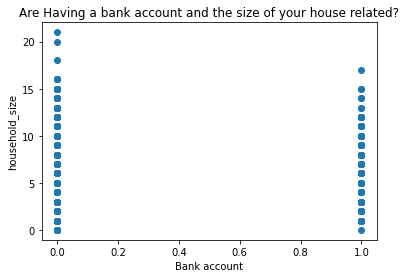

In [248]:
plt.scatter(df['Has a Bank account'],df['household_size'])
plt.title('Are Having a bank account and the size of your house related?')
plt.xlabel('Bank account')
plt.ylabel('household_size')
plt.show()

In [204]:
# Data reduction 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer

In [205]:
# Getting the chi square and the p-value of the data 
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(356.0000237238052, 1.5559218930361988e-37)

In [207]:
# We assign the numerical data to a variable x 
x = df[['household_size', 'Respondent Age','Has a Bank account']]

In [208]:
#Calculating the KMO using the factor analyser
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x)

In [209]:
#Using the factor analyzer to analyse
fa = FactorAnalyzer()
fa.analyze(x, 3, rotation=None)


In [210]:
# Calculating the eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.126893
1,0.992866
2,0.880241


In [211]:
# Reducing the factor to only one 
fa = FactorAnalyzer()
fa.analyze(x, 1, rotation="varimax")
fa.loadings

/usr/local/lib/python3.6/dist-packages/factor_analyzer/factor_analyzer.py:770: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


,Factor1
household_size,0.374741
Respondent Age,-0.319438
Has a Bank account,-0.061503


In [123]:
# Calculating the SSloadings, and variance 
fa.get_factor_variance()

,Factor1
SS Loadings,0.243647
Proportion Var,0.081216
Cumulative Var,0.081216


## 6. Implementing the solution 

In [ ]:
# Implementing the soloution


In [212]:
# Using the PCA analysis
#Splitting the data into numerical and categorical 
X = df.drop(['Has a Bank account','Respondent Age','household_size'], 1)
y = df[['Has a Bank account','Respondent Age','household_size']]

In [213]:
# Splitting the data into to so that later we can fit the classifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [214]:
# Fitting the Standard Scaler to transform the split data 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [215]:
# Fitting the PCA in and transforming the data onto the pca line
from sklearn.decomposition import PCA

pca = PCA()
y_train = pca.fit_transform(y_train)
y_test = pca.transform(y_test)

In [216]:
#Using the PCA to get the variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.37537635, 0.33059499, 0.29402866])

In [217]:
#Transforming the components off the PCA line
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
y_train = pca.fit_transform(y_train)
y_test = pca.transform(y_test)

In [ ]:
# Predicting where the other points could be 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(y_train,X_train)

X_pred = classifier.predict(y_test)

In [ ]:
# Getting more predictions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(X_test, X_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

## 7. Challenging the solution 

In [ ]:
# Challenging the solution 

## 8. Follow Up Questions

## Did we have the right data 

No we did not 

## Do we need other data to answer this question 

Yes we need more details about the bank to answer this question we needed to know how many people have bank accounts from each area and the other factors in this dataset 

##   Do we have the right question  